##**The North Face Product Recommendation Sytem**

**Extract and load dataset from Kaggle**

In [5]:
!kaggle datasets download -d cclark/product-item-data

Dataset URL: https://www.kaggle.com/datasets/cclark/product-item-data
License(s): unknown
  0% 0.00/137k [00:00<?, ?B/s]
100% 137k/137k [00:00<00:00, 99.5MB/s]


In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

###**Data Overview & Preprocessing**

In [7]:
df = pd.read_csv('/content/sample-data.csv')
df.head(10)

id                                        description
0   1  Active classic boxers - There's a reason why o...
1   2  Active sport boxer briefs - Skinning up Glory ...
2   3  Active sport briefs - These superbreathable no...
3   4  Alpine guide pants - Skin in, climb ice, switc...
4   5  Alpine wind jkt - On high ridges, steep ice an...
5   6  Ascensionist jkt - Our most technical soft she...
6   7  Atom - A multitasker's cloud nine, the Atom pl...
7   8  Print banded betina btm - Our fullest coverage...
8   9  Baby micro d-luxe cardigan - Micro D-Luxe is a...
9  10  Baby sun bucket hat - This hat goes on when th...

In [8]:
print(df.info())
print('Dataset size:')
print(f'Rows:{df.shape[0]}, Columns: {df.shape[1]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           500 non-null    int64 
 1   description  500 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.9+ KB
None
Dataset size:
Rows:500, Columns: 2


###**Text Preprocessing**

In [10]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Function to clean product descriptions
def clean_text (text):
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"\W+", " ", text)
    text = text.lower()
    text = " ".join([word for word in text.split() if word not in stopwords.words("english")])
    return text

In [14]:
df['clean_description'] = df['description'].apply(clean_text)

In [16]:
# Convert text to vectors using TF-IDF
vectorizer = TfidfVectorizer(stop_words ='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['clean_description'])

In [18]:
df.head()

id                                        description  \
0   1  Active classic boxers - There's a reason why o...   
1   2  Active sport boxer briefs - Skinning up Glory ...   
2   3  Active sport briefs - These superbreathable no...   
3   4  Alpine guide pants - Skin in, climb ice, switc...   
4   5  Alpine wind jkt - On high ridges, steep ice an...   

                                   clean_description  
0  active classic boxers reason boxers cult favor...  
1  active sport boxer briefs skinning glory requi...  
2  active sport briefs superbreathable fly briefs...  
3  alpine guide pants skin climb ice switch rock ...  
4  alpine wind jkt high ridges steep ice anything...

### PART 1: Clustering with DBSCAN ###

In [20]:
dbscan = DBSCAN(eps= 0.5,min_samples=5, metric='cosine')
clusters = dbscan.fit_predict(tfidf_matrix)
df['cluster'] = clusters

In [29]:
df_clusters = df[df['cluster'] != -1].groupby('cluster')
df_clusters.head()

id                                        description  \
7      8  Print banded betina btm - Our fullest coverage...   
14    15  Borderless shorts-11 in. - Go forward where ot...   
15    16  Borderless shorts-7 in. - One of summertime's ...   
17    18  Cap 1 bottoms - Spring skiing is as transient ...   
19    20  Cap 1 graphic t-shirt - This tee is made from ...   
..   ...                                                ...   
419  420  Riverwalker - sticky - High water. Slick bedro...   
476  477  L/s runshade top - Power pasta feed, one last ...   
479  480  Borderless messenger shorts - Pair these light...   
483  484  Borderless trek pants - The Ruby Crest trail r...   
484  485  Borderless trek zip-off pants - Made for techn...   

                                     clean_description  cluster  
7    print banded betina btm fullest coverage botto...       13  
14   borderless shorts 11 go forward others cringe ...        0  
15   borderless shorts 7 one summertime gifts chanc...        0  
17   cap 1 bottoms spring skiing transient wind mov...        1  
19   cap 1 graphic shirt tee made lightest weight c...        1  
..                                                 ...      ...  
419  riverwalker sticky high water slick bedrock co...       14  
476  l runshade top power pasta feed one last gear ...        9  
479  borderless messenger shorts pair lightweight s...        0  
483  borderless trek pants ruby crest trail runs tw...        0  
484  borderless trek zip pants made technical perfo...        0  

[75 rows x 4 columns]

In [36]:
# Save dbscan clusters to csv
dbscan_clusters = pd.DataFrame(df_clusters).to_csv('/content/dbscan_clusters.csv')

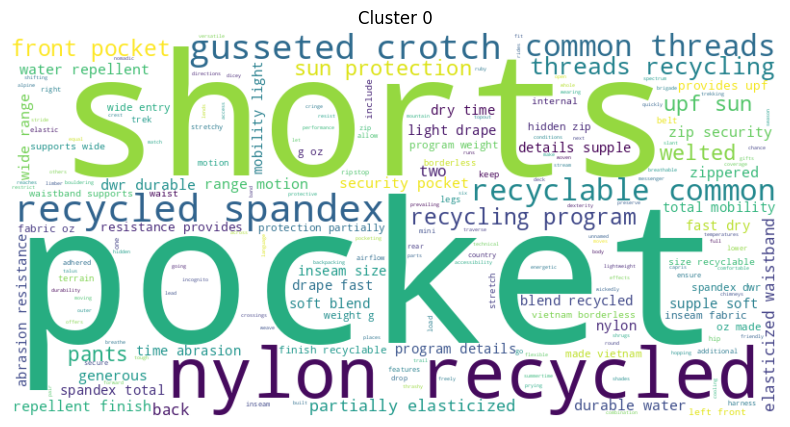

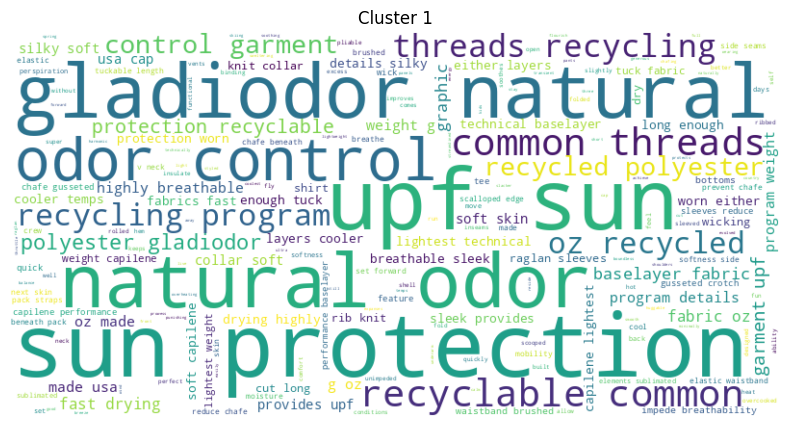

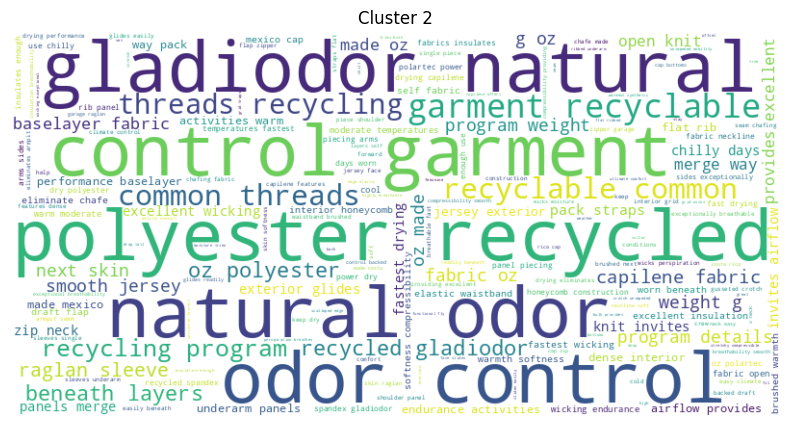

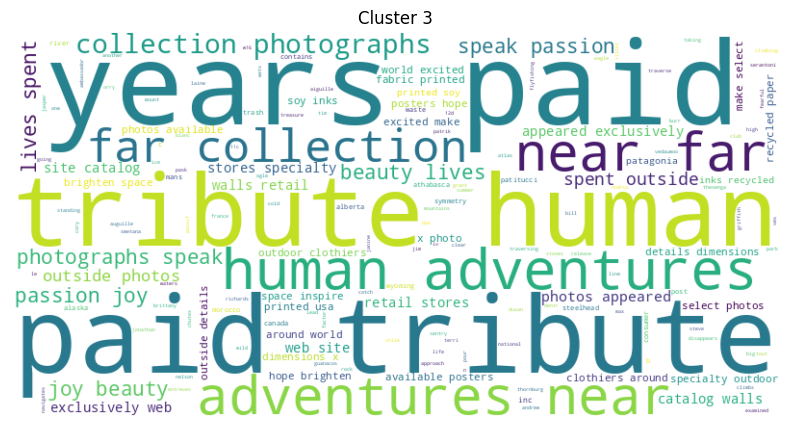

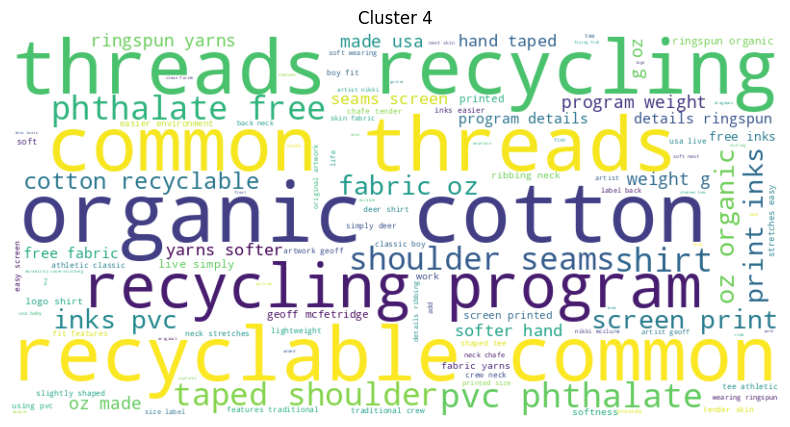

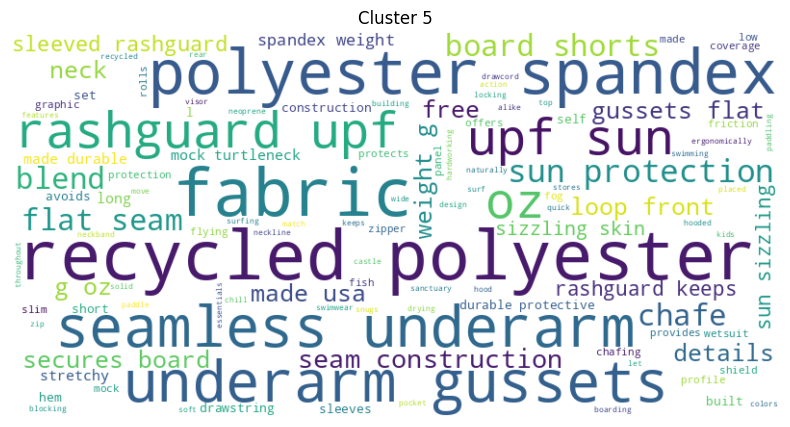

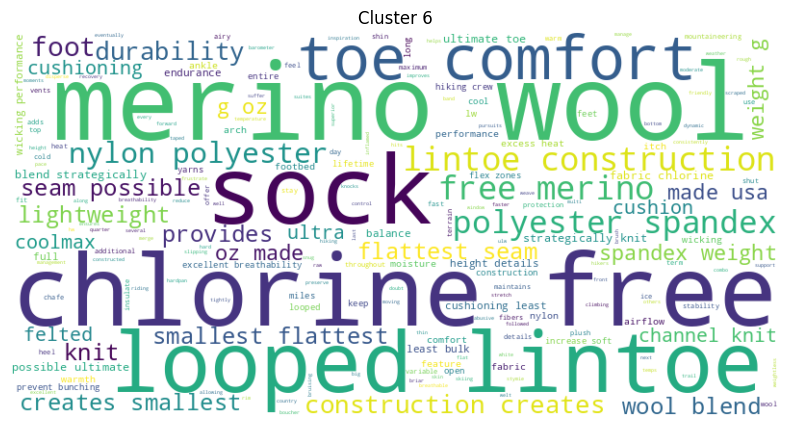

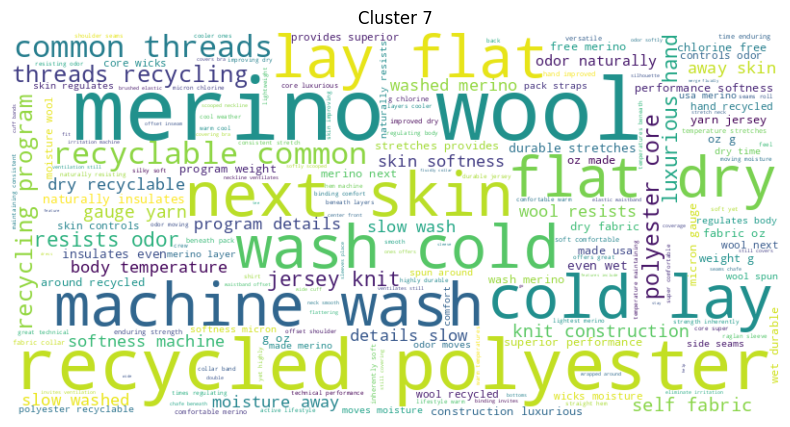

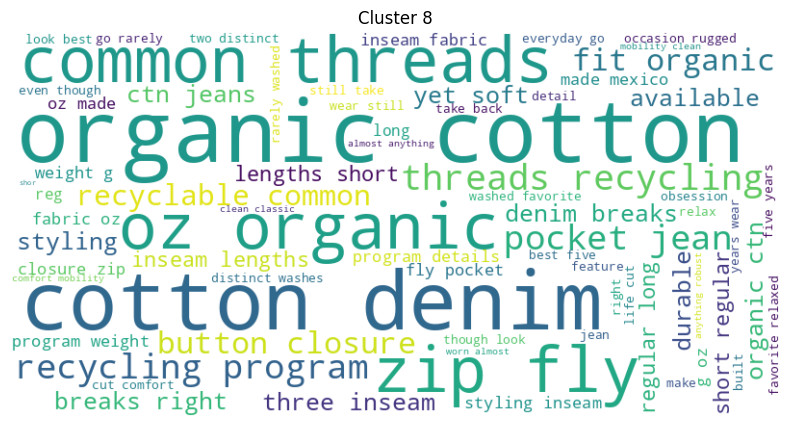

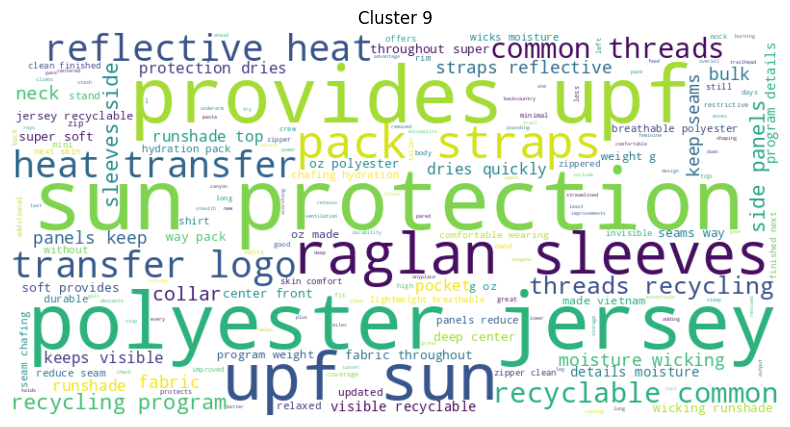

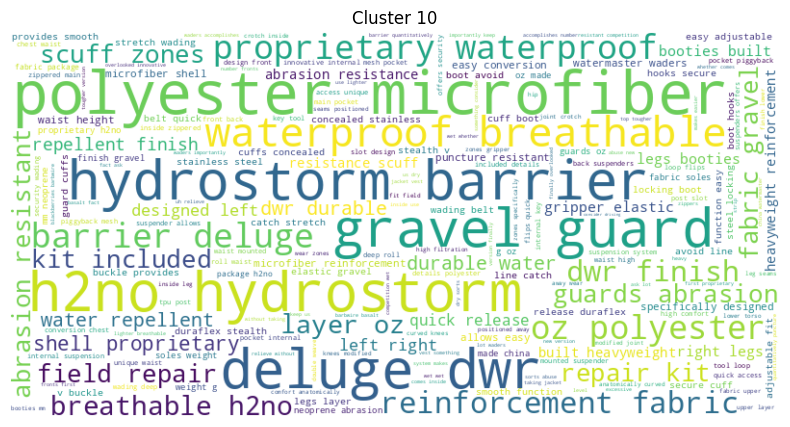

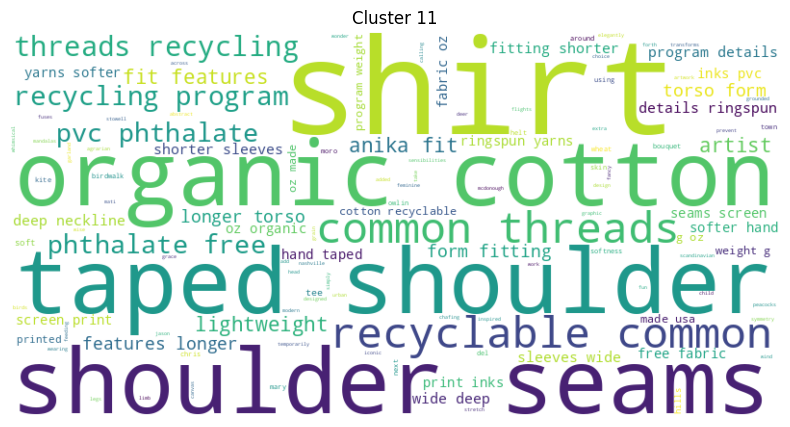

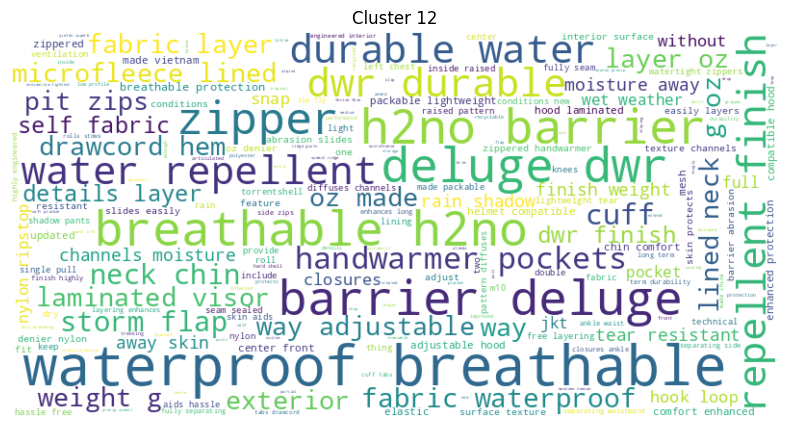

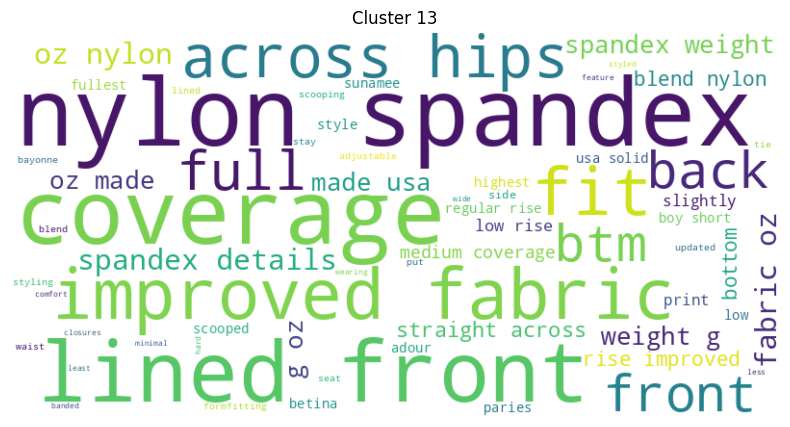

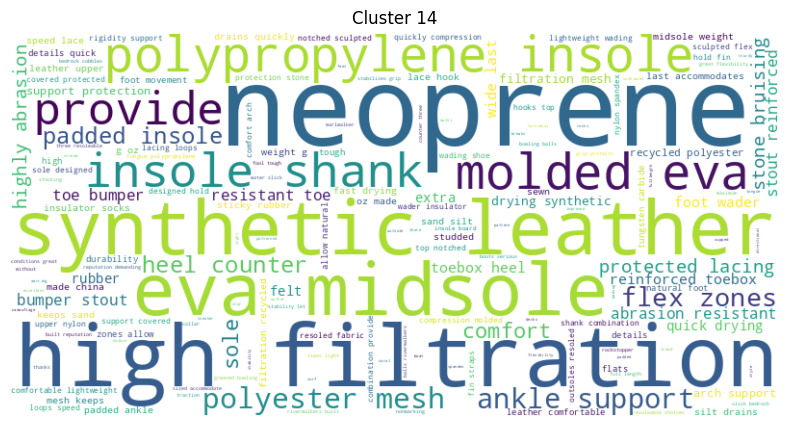

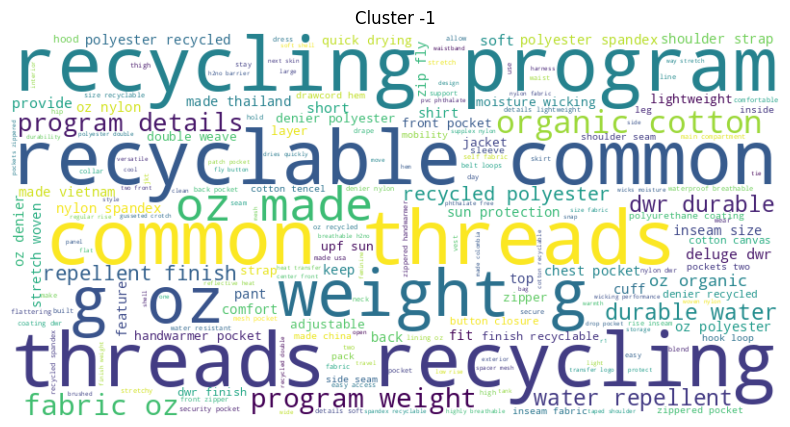

In [22]:
# Display wordcloud for each cluster
def plot_wordclouds():
    unique_clusters = set(df["cluster"])
    for cluster in unique_clusters:
        cluster_text = " ".join(df[df["cluster"] == cluster]["clean_description"])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Cluster {cluster}")
        plt.show()

plot_wordclouds()